In [4]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [3]:
from src.data import extract_data
from src.utils import init_hydra


cfg = init_hydra("main")
df, _ = extract_data("v1.0", cfg)

In [5]:
cancelled = df[df["Cancelled"]==True]
on_time = df[df["Cancelled"]==False]

In [6]:
cancelled.shape, on_time.shape

((25559, 61), (790105, 61))

In [7]:
representative_persent = (cancelled.shape[0]*100/on_time.shape[0]) / 100
print(representative_persent) 

0.032348865024268925


In [8]:
on_time = on_time.sample(frac=representative_persent)

In [9]:
import pandas as pd

df = pd.concat([cancelled,on_time])

In [10]:
df['Cancelled'].value_counts()

Cancelled
True     25559
False    25559
Name: count, dtype: int64

In [13]:
from src.data import preprocess_data


X, y = preprocess_data(cfg, df)

In [14]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    stratify=y,
    random_state=1,
)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1500,random_state=42,max_depth=1500)

rf.fit(X_train.values, y_train.values)

/home/sv-cheats-1/Documents/PROJECTS/MLops-project/.venv/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier(max_depth=1500, n_estimators=1500, random_state=42)

In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=42,
    n_estimators=1500,
    learning_rate=0.1,
    max_depth=1500,
    subsample=0.999,
    colsample_bytree=0.9999999,
    tree_method="hist",
    
)
xgb.fit(X_train.values, y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9999999, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1500, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.8482981220657277
F1 score: 0.848
Recall: 0.848
Precision: 0.848
AUC Score: 0.848
Classification report:
               precision    recall  f1-score   support

       False       0.84      0.86      0.85      5112
        True       0.86      0.84      0.85      5112

    accuracy                           0.85     10224
   macro avg       0.85      0.85      0.85     10224
weighted avg       0.85      0.85      0.85     10224

Confusion Matrix:


<Axes: >

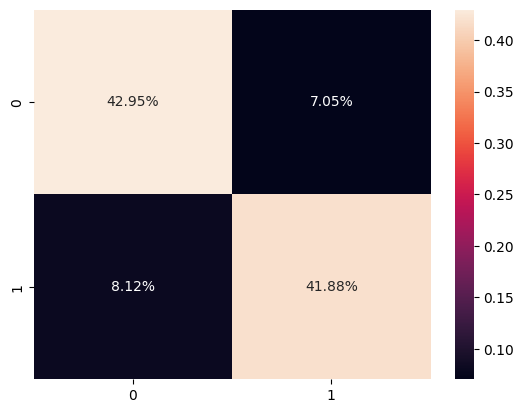

In [25]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
)
import seaborn as sn
import numpy as np

y_pred = rf.predict(X_test.values)
print("Accuracy:", accuracy_score(y_pred, y_test))
print("F1 score: %.3f" % f1_score(y_test, y_pred, average="weighted"))
print("Recall: %.3f" % recall_score(y_test, y_pred, average="weighted"))
print("Precision: %.3f" % precision_score(y_test, y_pred, average="weighted"))
print("AUC Score: %.3f" % roc_auc_score(y_test, y_pred, average="weighted"))

print("Classification report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred)
sn.heatmap(conf_mat/np.sum(conf_mat), annot=True,  fmt='.2%')

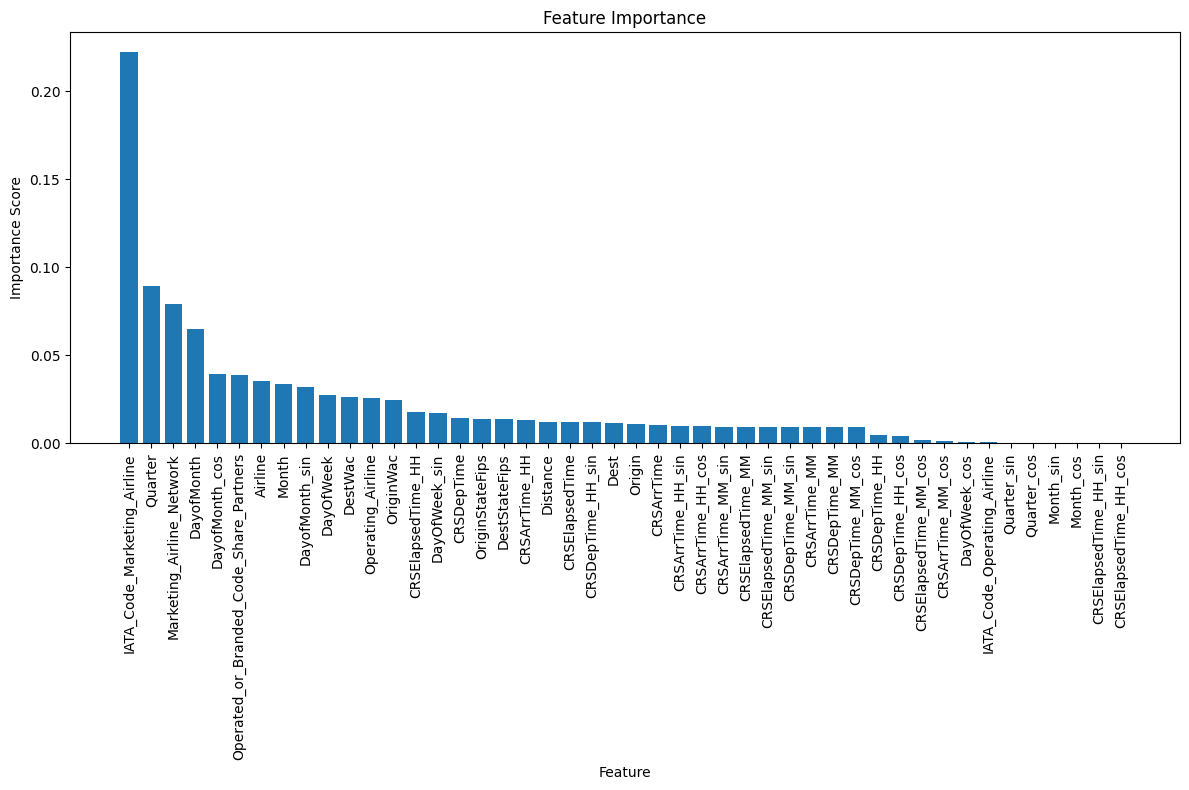

In [26]:
import matplotlib.pyplot as plt

# Accessing feature importances
feature_importances = xgb.feature_importances_

# Pairing feature names with their importance scores
features = X.columns
importance_scores = list(zip(features, feature_importances))

# Sorting the features by importance
sorted_importance_scores = sorted(importance_scores, key=lambda x: x[1], reverse=True)

# Plotting the feature importance graph
plt.figure(figsize=(12, 8))
plt.bar(
    range(len(sorted_importance_scores)),
    [score[1] for score in sorted_importance_scores],
)
plt.xticks(
    range(len(sorted_importance_scores)),
    [score[0] for score in sorted_importance_scores],
    rotation=90,
)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


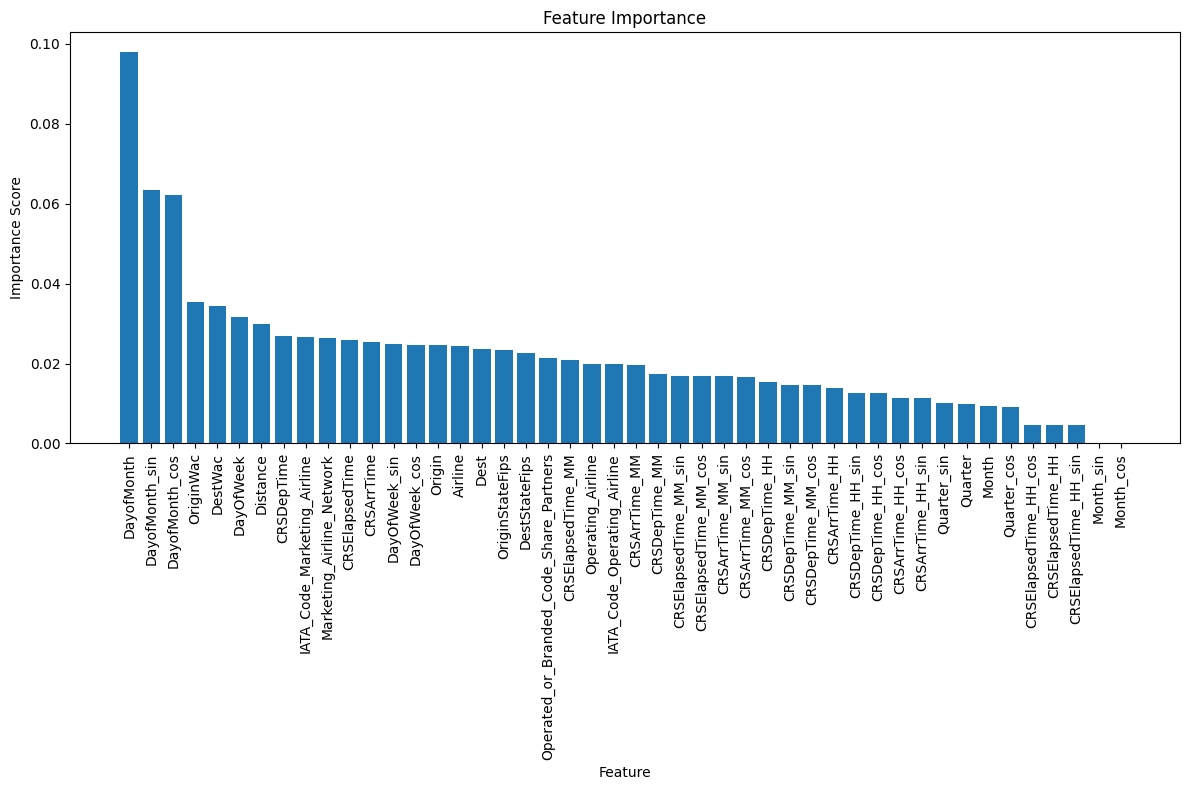

In [27]:
import matplotlib.pyplot as plt

# Accessing feature importances
feature_importances = rf.feature_importances_

# Pairing feature names with their importance scores
features = X.columns
importance_scores = list(zip(features, feature_importances))

# Sorting the features by importance
sorted_importance_scores = sorted(importance_scores, key=lambda x: x[1], reverse=True)

# Plotting the feature importance graph
plt.figure(figsize=(12, 8))
plt.bar(
    range(len(sorted_importance_scores)),
    [score[1] for score in sorted_importance_scores],
)
plt.xticks(
    range(len(sorted_importance_scores)),
    [score[0] for score in sorted_importance_scores],
    rotation=90,
)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
